In [187]:
import pandas as pd

# Gas Dataset load and data prep

In [188]:
df = pd.read_csv (r'..\\DataSet\\2004-2021.tsv', sep = '\t')
isGas = df['PRODUTO']=="GASOLINA COMUM"
dfGas = df[isGas]

dfGas = dfGas.drop(['PREÇO MÉDIO DISTRIBUIÇÃO', 'DESVIO PADRÃO DISTRIBUIÇÃO', 'PREÇO MÍNIMO DISTRIBUIÇÃO', 'PREÇO MÁXIMO DISTRIBUIÇÃO', 'COEF DE VARIAÇÃO DISTRIBUIÇÃO', 'DATA FINAL', 'PRODUTO', 'ESTADO'], axis=1)

dfGas['DATA INICIAL'] = pd.to_datetime(dfGas['DATA INICIAL'], format='%Y-%m-%d')
dfGas['MES'] = pd.DatetimeIndex(dfGas['DATA INICIAL']).month
dfGas['ANO'] = pd.DatetimeIndex(dfGas['DATA INICIAL']).year

# print(dfGas.dtypes)

In [189]:
region_centro_oeste = dfGas['REGIÃO']=="CENTRO OESTE"
dfGasGG = dfGas[region_centro_oeste]
dfGasGroup = dfGasGG.groupby(by=['ANO', 'MES', 'REGIÃO']).mean()
#dfGasGroup = dfGasGroup.drop(['REGIÃO'], axis=1)
dfGasGroup

NÚMERO DE POSTOS PESQUISADOS  PREÇO MÉDIO REVENDA  \
ANO  MES REGIÃO                                                            
2004 5   CENTRO OESTE                      224.6875             2.135250   
     6   CENTRO OESTE                      225.6250             2.197437   
     7   CENTRO OESTE                      225.0625             2.225000   
     8   CENTRO OESTE                      223.7000             2.281950   
     9   CENTRO OESTE                      223.0625             2.290875   
...                                             ...                  ...   
2020 12  CENTRO OESTE                       50.6875             4.621187   
2021 1   CENTRO OESTE                       58.3500             4.738250   
     2   CENTRO OESTE                       61.5000             5.141188   
     3   CENTRO OESTE                       69.0625             5.652687   
     4   CENTRO OESTE                       73.5000             5.574438   

                       DESVIO PADRÃO REVENDA  PREÇO MÍNIMO REVENDA  \
ANO  MES REGIÃO                                                      
2004 5   CENTRO OESTE               0.056875              1.944937   
     6   CENTRO OESTE               0.068250              1.991062   
     7   CENTRO OESTE               0.062187              2.047813   
     8   CENTRO OESTE               0.047650              2.114150   
     9   CENTRO OESTE               0.063250              2.100500   
...                                      ...                   ...   
2020 12  CENTRO OESTE               0.086438              4.395875   
2021 1   CENTRO OESTE               0.105400              4.496750   
     2   CENTRO OESTE               0.126875              4.846250   
     3   CENTRO OESTE               0.155812              5.313813   
     4   CENTRO OESTE               0.162000              5.269938   

                       PREÇO MÁXIMO REVENDA  COEF DE VARIAÇÃO REVENDA  
ANO  MES REGIÃO                                                        
2004 5   CENTRO OESTE              2.285563                  0.026250  
     6   CENTRO OESTE              2.371500                  0.031000  
     7   CENTRO OESTE              2.383250                  0.028437  
     8   CENTRO OESTE              2.402650                  0.020600  
     9   CENTRO OESTE              2.421813                  0.027750  
...                                     ...                       ...  
2020 12  CENTRO OESTE              4.808375                  0.018687  
2021 1   CENTRO OESTE              4.961500                  0.022200  
     2   CENTRO OESTE              5.448187                  0.024500  
     3   CENTRO OESTE              6.033375                  0.027563  
     4   CENTRO OESTE              5.919375                  0.029000  

[203 rows x 6 columns]

In [190]:
region_nordeste = dfGas['REGIÃO']=="NORDESTE"
dfGas_nord = dfGas[region_nordeste]
dfGasGroup_nord = dfGas_nord.groupby(by=['ANO', 'MES', 'REGIÃO']).mean()
#dfGasGroup = dfGasGroup.drop(['REGIÃO'], axis=1)
dfGasGroup_nord

NÚMERO DE POSTOS PESQUISADOS  PREÇO MÉDIO REVENDA  \
ANO  MES REGIÃO                                                        
2004 5   NORDESTE                    226.194444             2.040972   
     6   NORDESTE                    225.722222             2.120583   
     7   NORDESTE                    225.083333             2.163056   
     8   NORDESTE                    225.222222             2.172822   
     9   NORDESTE                    226.138889             2.173278   
...                                         ...                  ...   
2020 12  NORDESTE                     57.305556             4.605083   
2021 1   NORDESTE                     63.600000             4.755800   
     2   NORDESTE                     67.388889             5.130806   
     3   NORDESTE                     71.222222             5.545556   
     4   NORDESTE                     64.444444             5.425139   

                   DESVIO PADRÃO REVENDA  PREÇO MÍNIMO REVENDA  \
ANO  MES REGIÃO                                                  
2004 5   NORDESTE               0.075139              1.842750   
     6   NORDESTE               0.070444              1.919000   
     7   NORDESTE               0.078306              1.975694   
     8   NORDESTE               0.069133              1.999356   
     9   NORDESTE               0.074194              1.991528   
...                                  ...                   ...   
2020 12  NORDESTE               0.104500              4.418194   
2021 1   NORDESTE               0.103933              4.554889   
     2   NORDESTE               0.135111              4.841194   
     3   NORDESTE               0.135639              5.225111   
     4   NORDESTE               0.130583              5.203472   

                   PREÇO MÁXIMO REVENDA  COEF DE VARIAÇÃO REVENDA  
ANO  MES REGIÃO                                                    
2004 5   NORDESTE              2.216083                  0.036778  
     6   NORDESTE              2.307583                  0.033306  
     7   NORDESTE              2.329611                  0.036083  
     8   NORDESTE              2.337578                  0.031844  
     9   NORDESTE              2.345611                  0.033944  
...                                 ...                       ...  
2020 12  NORDESTE              4.820444                  0.022861  
2021 1   NORDESTE              4.997778                  0.021756  
     2   NORDESTE              5.451667                  0.026194  
     3   NORDESTE              5.867694                  0.024389  
     4   NORDESTE              5.758056                  0.024083  

[203 rows x 6 columns]

In [191]:
region_sudeste = dfGas['REGIÃO']=='SUDESTE'
dfGas_sudeste = dfGas[region_sudeste]
dfGasGroup_sudeste = dfGas_sudeste.groupby(by=['ANO', 'MES', 'REGIÃO']).mean()
dfGasGroup_sudeste

NÚMERO DE POSTOS PESQUISADOS  PREÇO MÉDIO REVENDA  \
ANO  MES REGIÃO                                                       
2004 5   SUDESTE                     1700.8750             1.986938   
     6   SUDESTE                     1707.5625             2.066125   
     7   SUDESTE                     1709.5625             2.106625   
     8   SUDESTE                     1711.4500             2.114150   
     9   SUDESTE                     1710.3125             2.125938   
...                                        ...                  ...   
2020 12  SUDESTE                      266.0625             4.540250   
2021 1   SUDESTE                      296.6500             4.702800   
     2   SUDESTE                      339.1875             5.136875   
     3   SUDESTE                      399.3750             5.673687   
     4   SUDESTE                      421.8125             5.649188   

                  DESVIO PADRÃO REVENDA  PREÇO MÍNIMO REVENDA  \
ANO  MES REGIÃO                                                 
2004 5   SUDESTE               0.095250              1.698500   
     6   SUDESTE               0.096312              1.750375   
     7   SUDESTE               0.091375              1.804750   
     8   SUDESTE               0.095200              1.826050   
     9   SUDESTE               0.085750              1.848250   
...                                 ...                   ...   
2020 12  SUDESTE               0.154312              4.126625   
2021 1   SUDESTE               0.162000              4.295050   
     2   SUDESTE               0.186000              4.684188   
     3   SUDESTE               0.189062              5.075938   
     4   SUDESTE               0.187688              5.083812   

                  PREÇO MÁXIMO REVENDA  COEF DE VARIAÇÃO REVENDA  
ANO  MES REGIÃO                                                   
2004 5   SUDESTE              2.333063                  0.047875  
     6   SUDESTE              2.399125                  0.046812  
     7   SUDESTE              2.422875                  0.043375  
     8   SUDESTE              2.426650                  0.045050  
     9   SUDESTE              2.429938                  0.040313  
...                                ...                       ...  
2020 12  SUDESTE              4.983500                  0.034250  
2021 1   SUDESTE              5.225000                  0.034900  
     2   SUDESTE              5.704688                  0.036375  
     3   SUDESTE              6.216938                  0.033438  
     4   SUDESTE              6.214688                  0.033438  

[203 rows x 6 columns]

In [192]:
region_sul = dfGas['REGIÃO']=='SUL'
dfGas_sul = dfGas[region_sul]
dfGasGroup_sul = dfGas_sul.groupby(by=['ANO', 'MES', 'REGIÃO']).mean()
dfGasGroup_sul

NÚMERO DE POSTOS PESQUISADOS  PREÇO MÉDIO REVENDA  \
ANO  MES REGIÃO                                                      
2004 5   SUL                       698.416667             2.060500   
     6   SUL                       694.833333             2.156167   
     7   SUL                       701.916667             2.188250   
     8   SUL                       699.266667             2.211200   
     9   SUL                       694.250000             2.204500   
...                                       ...                  ...   
2020 12  SUL                       122.500000             4.408667   
2021 1   SUL                       147.800000             4.555800   
     2   SUL                       166.666667             4.981583   
     3   SUL                       163.833333             5.442167   
     4   SUL                       172.166667             5.303000   

                 DESVIO PADRÃO REVENDA  PREÇO MÍNIMO REVENDA  \
ANO  MES REGIÃO                                                
2004 5   SUL                  0.086083              1.803917   
     6   SUL                  0.085667              1.878583   
     7   SUL                  0.087250              1.930500   
     8   SUL                  0.078800              1.968933   
     9   SUL                  0.081917              1.987167   
...                                ...                   ...   
2020 12  SUL                  0.156333              4.153083   
2021 1   SUL                  0.161533              4.243800   
     2   SUL                  0.170500              4.597667   
     3   SUL                  0.200500              4.967750   
     4   SUL                  0.221750              4.969417   

                 PREÇO MÁXIMO REVENDA  COEF DE VARIAÇÃO REVENDA  
ANO  MES REGIÃO                                                  
2004 5   SUL                 2.345167                  0.041500  
     6   SUL                 2.434000                  0.039583  
     7   SUL                 2.521667                  0.039750  
     8   SUL                 2.505333                  0.035467  
     9   SUL                 2.476250                  0.036917  
...                               ...                       ...  
2020 12  SUL                 4.912750                  0.035250  
2021 1   SUL                 5.104667                  0.035200  
     2   SUL                 5.548333                  0.034167  
     3   SUL                 6.012417                  0.036667  
     4   SUL                 6.039833                  0.041750  

[203 rows x 6 columns]

In [193]:
region_norte = dfGas['REGIÃO']=='NORTE'
dfGas_norte = dfGas[region_norte]
dfGasGroup_norte = dfGas_norte.groupby(by=['ANO', 'MES', 'REGIÃO']).mean()
dfGasGroup_norte

NÚMERO DE POSTOS PESQUISADOS  PREÇO MÉDIO REVENDA  \
ANO  MES REGIÃO                                                      
2004 5   NORTE                      95.500000             2.208464   
     6   NORTE                      95.071429             2.282214   
     7   NORTE                      94.321429             2.332179   
     8   NORTE                      94.342857             2.352429   
     9   NORTE                      95.142857             2.363929   
...                                       ...                  ...   
2020 12  NORTE                      24.321429             4.484536   
2021 1   NORTE                      25.857143             4.651486   
     2   NORTE                      30.571429             5.065500   
     3   NORTE                      30.892857             5.545714   
     4   NORTE                      31.964286             5.526286   

                 DESVIO PADRÃO REVENDA  PREÇO MÍNIMO REVENDA  \
ANO  MES REGIÃO                                                
2004 5   NORTE                0.109643              1.963143   
     6   NORTE                0.102643              2.033000   
     7   NORTE                0.099964              2.102857   
     8   NORTE                0.101886              2.128000   
     9   NORTE                0.101250              2.144286   
...                                ...                   ...   
2020 12  NORTE                0.063929              4.411143   
2021 1   NORTE                0.082943              4.540171   
     2   NORTE                0.134607              4.894679   
     3   NORTE                0.171964              5.376929   
     4   NORTE                0.150143              5.348571   

                 PREÇO MÁXIMO REVENDA  COEF DE VARIAÇÃO REVENDA  
ANO  MES REGIÃO                                                  
2004 5   NORTE               2.501071                  0.048857  
     6   NORTE               2.542857                  0.044286  
     7   NORTE               2.598214                  0.041964  
     8   NORTE               2.613429                  0.042314  
     9   NORTE               2.627143                  0.041929  
...                               ...                       ...  
2020 12  NORTE               4.620679                  0.014679  
2021 1   NORTE               4.829286                  0.017771  
     2   NORTE               5.334679                  0.026107  
     3   NORTE               5.933107                  0.031143  
     4   NORTE               5.854893                  0.026821  

[203 rows x 6 columns]

# Petroleum Dataset load and data prep

In [194]:
csv_location = '..\\DataSet\\Petróleo Brent Futuros Dados Históricos.csv'
dfPetro = pd.read_csv (csv_location)

In [195]:
dfPetro['Data'] = pd.to_datetime(dfPetro['Data'], format='%d.%m.%Y')
dfPetro['MES'] = pd.DatetimeIndex(dfPetro['Data']).month
dfPetro['ANO'] = pd.DatetimeIndex(dfPetro['Data']).year

dfPetro['Último'] = dfPetro['Último'].astype('str')
dfPetro['Último'] = dfPetro['Último'].str.replace(',', '.')
dfPetro['Último'] = pd.to_numeric(dfPetro['Último'], errors='coerce')

#dfPetro['Último'] = dfPetro['Último'].astype('str') 
#dfPetro.apply(lambda x: x.str.replace(',','.'))
#dfPetro['Último'] = dfPetro['Último'].astype(float)
#print(dfPetro.dtypes)
#dfPetro

In [196]:
dfPetro

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%,MES,ANO
0,2021-12-31,77.78,"78,81","79,68","77,55","148,96K","-1,94%",12,2021
1,2021-12-30,79.32,"79,19","79,66","78,50","10,90K","0,11%",12,2021
2,2021-12-29,79.23,"79,28","80,17","78,13","69,63K","0,37%",12,2021
3,2021-12-28,78.94,"78,67","79,85","78,48","50,41K","0,43%",12,2021
4,2021-12-27,78.60,"76,32","79,08","75,75","85,39K","3,23%",12,2021
...,...,...,...,...,...,...,...,...,...
2836,2011-01-07,93.33,"94,38","94,58","92,59","165,97K","-1,26%",1,2011
2837,2011-01-06,94.52,"95,70","96,12","94,01","217,45K","-1,03%",1,2011
2838,2011-01-05,95.50,"93,35","95,86","92,37","212,40K","2,11%",1,2011
2839,2011-01-04,93.53,"94,92","95,74","92,58","184,63K","-1,38%",1,2011


In [197]:
dfPeroGroup = dfPetro.groupby(by=['ANO', 'MES']).mean()

In [198]:
dfPeroGroup

Último
ANO  MES            
2011 1     96.907143
     2    104.032000
     3    114.671739
     4    123.090500
     5    114.521818
...              ...
2021 8     70.513636
     9     74.876364
     10    83.746190
     11    80.849545
     12    74.803913

[132 rows x 1 columns]

# Geração de graficos

In [199]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='ANO,MES'>

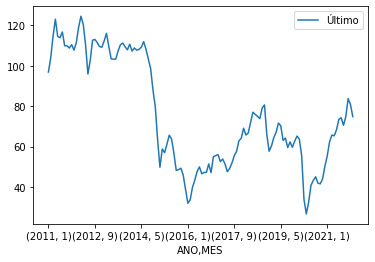

In [200]:
dfPeroGroup.plot()

<AxesSubplot:xlabel='ANO,MES,REGIÃO'>

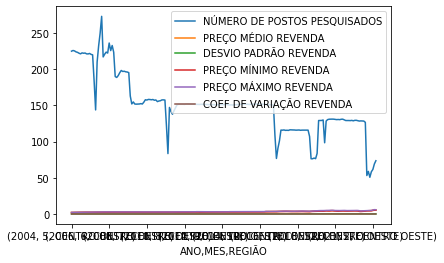

In [201]:
dfGasGroup.plot()